#### test_tumor_samples.tsv.gz analysis

In [2]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "test_tumor_samples.tsv", sep="\t")
filter_df = pd.read_csv(DATA_DIR / "metapathway_nodes_2025.tsv", sep="\t")
filter_id_col = "#Id"

rows, cols = df.shape
print("Features:", rows)
print("Samples:", cols)

input_nodes = df.index.values.astype(str).tolist()
filter_nodes = filter_df[filter_id_col].tolist()

filtered_input_nodes = [int(str(node)) for node in input_nodes if str(node) in filter_nodes]

df = df.loc[filtered_input_nodes]

rows, cols = df.shape
print("Filtered features with metapathway nodes")
print("Features:", rows)
print("Samples:", cols)

Features: 43546
Samples: 1110
Filtered features with metapathway nodes
Features: 15859
Samples: 1110


#### metapathway_nodes_2025.tsv analysis

In [7]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "metapathway_nodes_2025.tsv", sep="\t")
rows, cols = df.shape
print("Number of metapathway nodes:", rows)

Number of metapathway nodes: 20507


#### metapathway_nodes_to_pathways_2025.tsv analysis

In [1]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "metapathway_nodes_to_pathways_2025.tsv", sep="\t")

rows = df["#PathwayId"].drop_duplicates().count()
nodes = df["NodeId"].drop_duplicates().count()
print(nodes)
print("Number of unique pathways:", rows)

15825
Number of unique pathways: 2159


#### Feature analysis for outliers

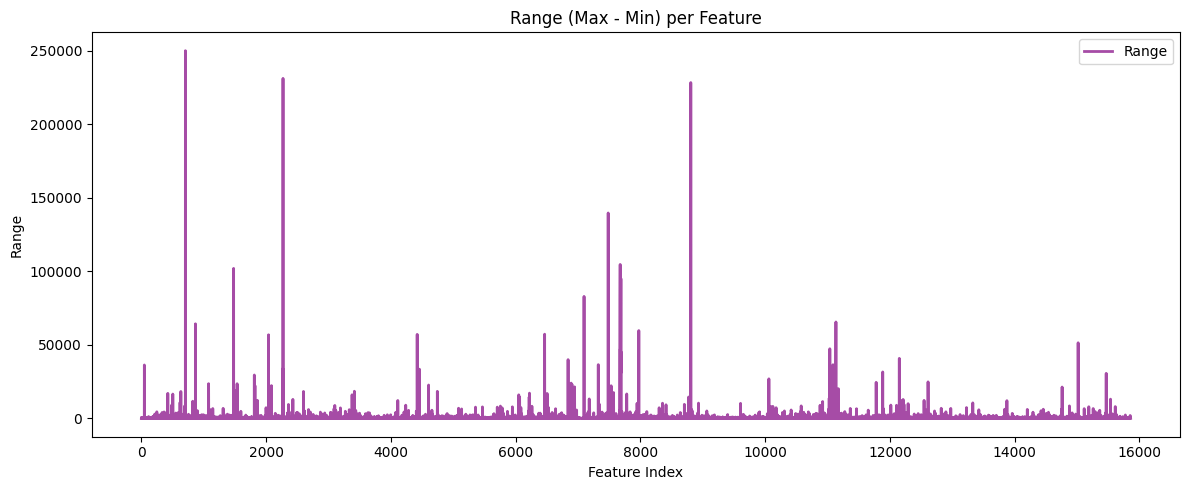

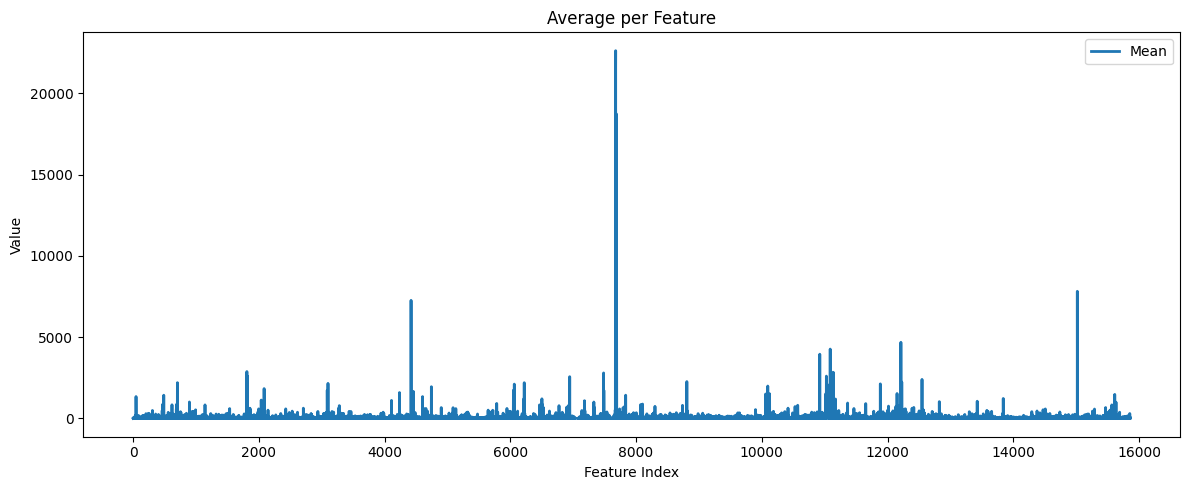

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "test_tumor_samples.tsv", sep="\t")
filter_df = pd.read_csv(DATA_DIR / "metapathway_nodes_2025.tsv", sep="\t")
filter_id_col = "#Id"
input_nodes = df.index.values.astype(str).tolist()
filter_nodes = filter_df[filter_id_col].tolist()
filtered_input_nodes = [int(str(node)) for node in input_nodes if str(node) in filter_nodes]
df = df.loc[filtered_input_nodes]

min_vals = df.min(axis=1)
max_vals = df.max(axis=1)
avg_vals = df.mean(axis=1)
ranges = max_vals - min_vals

x = np.arange(len(df))

plt.figure(figsize=(12, 5))
plt.plot(x, ranges, label='Range', color='purple', alpha=0.7, linewidth=2)

plt.title('Range (Max - Min) per Feature')
plt.xlabel('Feature Index')
plt.ylabel('Range')
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(x, avg_vals, label='Mean', linewidth=2)

plt.title('Average per Feature')
plt.xlabel('Feature Index')
plt.ylabel('Value')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
import pandas as pd
from pathlib import Path

DATA_DIR = Path("data")

df = pd.read_csv(DATA_DIR / "metapathway_edges_simplified_2025.tsv", sep="\t")
rows, cols = df.shape
print("Number of edges in metapathway:", rows)

Number of edges in metapathway: 257823
